## Code to plot Figure 4: Comparing BOSC, eBOSC and fBOSC hit rate and false alarm rate for alpha and theta oscillations

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas as pd
from scipy import stats
from matplotlib.pyplot import figure

In [2]:
# Set seaborn style
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [2]:
def _reduce_box_width(artist, factor=.5):
    vertices = artist.get_path().vertices
    artist_width = vertices[1, 0] - vertices[0, 0]
    vertices[0, 0] += artist_width * (factor/2)
    vertices[1, 0] -= artist_width * (factor/2)
    vertices[2, 0] -= artist_width * (factor/2)
    vertices[3, 0] += artist_width * (factor/2)
    vertices[4, 0] += artist_width * (factor/2)
    vertices[5, 0] += artist_width * (factor/2)

def _reduce_horizontal_line_width(artist, factor=.5):
    vertices = artist.get_path().vertices
    artist_width = vertices[1, 0] - vertices[0, 0]
    vertices[0, 0] += artist_width * (factor/2)
    vertices[1, 0] -= artist_width * (factor/2)

In [25]:
df = pd.read_csv('HR_FA.csv')
df.head()

,HR,FA,condition,freq_label
0,0.815000,0.002857,BOSC,theta
1,0.996667,0.100143,BOSC,alpha
2,0.809000,0.002143,eBOSC,theta
3,0.997333,0.104000,eBOSC,alpha
4,0.873000,0.024143,fBOSC,theta


In [6]:
def change_width(ax, new_value) :
    col = ['#ff5c04','#c8588e','#045cff','#ff5c04','#c8588e','#045cff']
    count = 0
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        # Set color manually
        patch.set_color(col[count])
        count=count+1

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


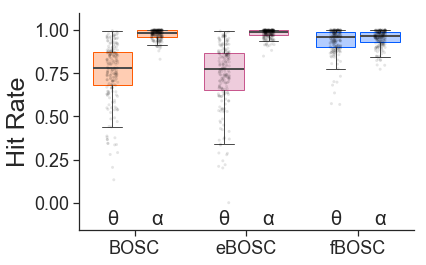

In [15]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

txt   = ['θ','θ','θ','α','α','α']
col = ['#ff5c04','#ff5c04','#c8588e','#c8588e','#045cff','#045cff']
count=0

# Plot a transparent barchart
ax = sns.barplot(x="condition", y="HR",hue="freq_label",ci=None,
                 palette=sns.color_palette(['#057523','#a200ff']),
                    linewidth=2,alpha=0,edgecolor='white', data=df)

# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(txt[count],(bar.get_x() + bar.get_width() / 2,
                    -0.14), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')
    count = count+1
    
ax = sns.boxplot(x="condition", y="HR", hue="freq_label",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

count = 0

# Iterrating over the boxes one-by-one
# Change the color manually
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])
    _reduce_box_width(patch, factor=.1)

horizontal_lines = [l for l in ax.lines
                    if len(l.get_path().vertices) != 0 and
                       l.get_path().vertices[0, 1] == l.get_path().vertices[1, 1]]

for line in horizontal_lines:
    _reduce_horizontal_line_width(line,factor=.1)
    
ax = sns.stripplot(x="condition", y="HR",hue="freq_label",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("Hit Rate",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
#ax.set_xticklabels(['Control','Visual\nSnow'])
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim([-0.16, 1.1])
plt.legend([],[], frameon=False)
fig = ax.get_figure()
fig.show()
fig.savefig('HR_avg.png', bbox_inches='tight',dpi=600)

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


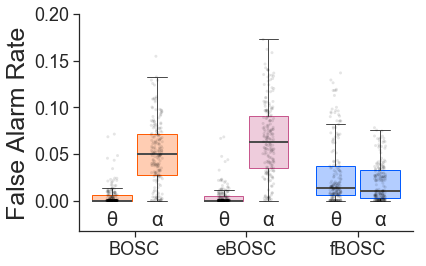

In [32]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

count = 0
txt   = ['θ','θ','θ','α','α','α']
col = ['#ff5c04','#ff5c04','#c8588e','#c8588e','#045cff','#045cff']

# Plot a transparent barchart
ax = sns.barplot(x="condition", y="FA",hue="freq_label",ci=None,
                 palette=sns.color_palette(['#057523','#a200ff']),
                    linewidth=2,alpha=0,edgecolor='white', data=df)

# Iterrating over the bars one-by-one
count = 0
for bar in ax.patches:
    ax.annotate(txt[count],(bar.get_x() + bar.get_width() / 2,
                    -0.03), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')
    count = count+1
    
ax = sns.boxplot(x="condition", y="FA", hue="freq_label",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])
    _reduce_box_width(patch, factor=.1)

horizontal_lines = [l for l in ax.lines
                    if len(l.get_path().vertices) != 0 and
                       l.get_path().vertices[0, 1] == l.get_path().vertices[1, 1]]

for line in horizontal_lines:
    _reduce_horizontal_line_width(line,factor=.1)
    
ax = sns.stripplot(x="condition", y="FA",hue="freq_label",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("False Alarm Rate",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.033, 0.2])
#ax.set_xticklabels(['Control','Visual\nSnow'])
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)
fig = ax.get_figure()
fig.show()
fig.savefig('FA_avg.png', bbox_inches='tight',dpi=600)

In [33]:
df = pd.read_csv('HR_FA_diff.csv')
df.head()

,diff_HR,diff_FA,condition
0,0.181667,0.097286,BOSC
1,0.188333,0.101857,eBOSC
2,0.108333,0.042143,fBOSC
3,0.589000,0.077857,BOSC
4,0.594333,0.093857,eBOSC


/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


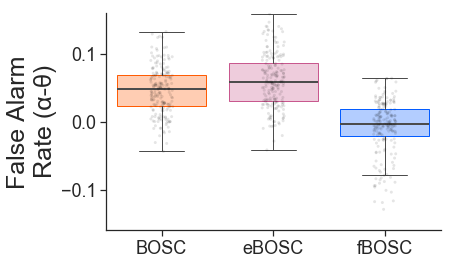

In [22]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

count = 0
col = ['#ff5c04','#c8588e','#045cff']

# Plot a transparent barchart
ax = sns.barplot(x="condition", y="diff_FA",ci=None,
                 palette=sns.color_palette(['#057523','#a200ff']),
                    linewidth=2,alpha=0,edgecolor='white', data=df)
    
ax = sns.boxplot(x="condition", y="diff_FA",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])


ax = sns.stripplot(x="condition", y="diff_FA",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

    
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("False Alarm\nRate (α-θ)",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
ax.set_ylim([-0.16, 0.16])
#ax.set_xticklabels(['Control','Visual\nSnow'])
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)

fig = ax.get_figure()
fig.show()
fig.savefig('FA_diff.png', bbox_inches='tight',dpi=600)

/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2787: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/rseymoue/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


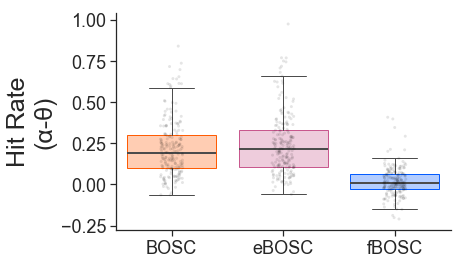

In [34]:
# Boxplot instead
ax = []
sns.set(rc = {'figure.figsize':(6,4)})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

count = 0
col = ['#ff5c04','#c8588e','#045cff']

# Plot a transparent barchart
ax = sns.barplot(x="condition", y="diff_HR",ci=None,
                 palette=sns.color_palette(['#057523','#a200ff']),
                    linewidth=2,alpha=0,edgecolor='white', data=df)
    
ax = sns.boxplot(x="condition", y="diff_HR",
                 data=df, linewidth=1,showfliers = False,medianprops={"linewidth": 2,
                        "solid_capstyle": "butt"}, dodge=True)

# Iterrating over the boxes one-by-one
# Change the color manually
count = 0
for patch in ax.artists:
    # Set color manually
    patch.set_color(col[count])
    count=count+1


# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#     patch.set_linestyle([0, 0, 0])

ax = sns.stripplot(x="condition", y="diff_HR",split=True,dodge=True,
                   palette=sns.color_palette(['black']),
                   alpha=0.1,size=3, data=df)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel("Hit Rate\n(α-θ)",fontsize=25,fontname="Arial")
ax.set_xlabel("",fontsize=25,fontname="Arial")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yscale("log")
plt.legend([],[], frameon=False)
fig = ax.get_figure()
fig.show()
fig.savefig('HR_diff.png', bbox_inches='tight',dpi=600)